In [1]:
import keras
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, BatchNormalization, Dense, Flatten, LayerNormalization
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.applications as appl
from sklearn.model_selection import train_test_split
import os
import cv2
import time
import random
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.metrics as metrics
from tqdm import tqdm
from tensorflow.keras.utils import Sequence
from keras import callbacks  
from keras.models import load_model
from keras.utils import np_utils

In [2]:
load_path='E:/VA/onehandtwohand/128/106words_DSLR_FH/'

In [3]:
CATEGORIES=np.load(load_path+'cat_106.npy', allow_pickle=True)

In [4]:
IMG_SIZE=128

In [5]:
cat_len=len(CATEGORIES)
print(cat_len)

106


# Save combined data npy

In [6]:
# model

# model_name1 = 'InceptionResNetV2'
# model_name1 = '4layer'
model_name1 = 'depthwise4_106words_dslr128'
#model_name2 = 'VGG16'
# model_name1 = 'DenseNet121'
# model_name1 = 'InceptionV3'

Loading

In [7]:
X=np.load(load_path+'X_dslr.npy', allow_pickle=True)
Y=np.load(load_path+'Y_dslr.npy', allow_pickle=True)

In [8]:
X = X.astype('float32')
X /= 255


In [9]:
print('Splitting') 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = cat_len)
X_train, X_new, y_train, y_new = train_test_split(X_train, y_train, test_size = 0.2, random_state = cat_len)
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_new = np.array(X_new)
y_new = np.array(y_new)

print("pass")

Splitting
pass


In [10]:
del X,Y

In [11]:
print('Image Data Augmentation')
from keras.preprocessing.image import ImageDataGenerator
val_generator = ImageDataGenerator(rotation_range=0, zoom_range=0.2, width_shift_range=0.2,
    height_shift_range=0.2, shear_range=0.2)
#                                     , horizontal_flip=True, brightness_range=[0.6,1.3])
val_generator.fit(X_train)
val_generator.fit(X_new)
val_generator.fit(X_test)

print("done")

Image Data Augmentation
done


In [13]:
import tensorflow as tf

# Define the model architecture
model = tf.keras.Sequential([
    # First layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Second layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Third layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Fourth layer: Depthwise Convolution
    tf.keras.layers.DepthwiseConv2D(kernel_size=3, padding='same', activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    
    # Flatten the output from convolutional layers
    tf.keras.layers.Flatten(),
    
    # Add a dense layer to learn the final classification
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    
    # Output layer with softmax activation function for multi-class classification
    tf.keras.layers.Dense(106, activation='softmax')
])


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 depthwise_conv2d_4 (Depthwi  (None, 128, 128, 3)      30        
 seConv2D)                                                       
                                                                 
 batch_normalization_4 (Batc  (None, 128, 128, 3)      12        
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 3)        0         
 2D)                                                             
                                                                 
 depthwise_conv2d_5 (Depthwi  (None, 64, 64, 3)        30        
 seConv2D)                                                       
                                                                 
 batch_normalization_5 (Batc  (None, 64, 64, 3)       

In [14]:
print('Training model 1')
opt = Adam(learning_rate=0.00001)
earlystopping = callbacks.EarlyStopping(monitor="val_loss", patience = 10, restore_best_weights = True)
# Compile the model with categorical crossentropy loss function and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
# model1.summary()



history_const = model.fit(X_train, y_train,batch_size=50, epochs = 1000, validation_data=(X_test,y_test),
                   callbacks= [earlystopping])


Training model 1
Epoch 1/1000
487/487 [==============================] - 21s 39ms/step - loss: 5.1424 - accuracy: 0.0127 - val_loss: 4.5525 - val_accuracy: 0.0284
Epoch 2/1000
487/487 [==============================] - 18s 36ms/step - loss: 4.7912 - accuracy: 0.0252 - val_loss: 4.3894 - val_accuracy: 0.0571
Epoch 3/1000
487/487 [==============================] - 18s 36ms/step - loss: 4.5396 - accuracy: 0.0462 - val_loss: 4.1721 - val_accuracy: 0.1064
Epoch 4/1000
487/487 [==============================] - 18s 37ms/step - loss: 4.3258 - accuracy: 0.0695 - val_loss: 3.9889 - val_accuracy: 0.1485
Epoch 5/1000
487/487 [==============================] - 18s 36ms/step - loss: 4.1476 - accuracy: 0.0989 - val_loss: 3.8416 - val_accuracy: 0.1803
Epoch 6/1000
487/487 [==============================] - 18s 36ms/step - loss: 3.9805 - accuracy: 0.1237 - val_loss: 3.7118 - val_accuracy: 0.2013
Epoch 7/1000
487/487 [==============================] - 18s 37ms/step - loss: 3.8469 - accuracy: 0.1437 - v

Epoch 57/1000
487/487 [==============================] - 18s 36ms/step - loss: 1.7795 - accuracy: 0.5060 - val_loss: 1.6115 - val_accuracy: 0.5776
Epoch 58/1000
487/487 [==============================] - 18s 36ms/step - loss: 1.7611 - accuracy: 0.5084 - val_loss: 1.5951 - val_accuracy: 0.5831
Epoch 59/1000
487/487 [==============================] - 18s 37ms/step - loss: 1.7379 - accuracy: 0.5161 - val_loss: 1.5749 - val_accuracy: 0.5877
Epoch 60/1000
487/487 [==============================] - 17s 36ms/step - loss: 1.7161 - accuracy: 0.5223 - val_loss: 1.5574 - val_accuracy: 0.5932
Epoch 61/1000
487/487 [==============================] - 17s 36ms/step - loss: 1.7002 - accuracy: 0.5244 - val_loss: 1.5373 - val_accuracy: 0.5977
Epoch 62/1000
487/487 [==============================] - 18s 36ms/step - loss: 1.6876 - accuracy: 0.5269 - val_loss: 1.5202 - val_accuracy: 0.6029
Epoch 63/1000
487/487 [==============================] - 18s 36ms/step - loss: 1.6662 - accuracy: 0.5316 - val_loss: 1

487/487 [==============================] - 18s 37ms/step - loss: 1.0104 - accuracy: 0.7095 - val_loss: 0.9060 - val_accuracy: 0.7625
Epoch 113/1000
487/487 [==============================] - 18s 36ms/step - loss: 1.0060 - accuracy: 0.7103 - val_loss: 0.8969 - val_accuracy: 0.7651
Epoch 114/1000
487/487 [==============================] - 18s 36ms/step - loss: 1.0025 - accuracy: 0.7096 - val_loss: 0.8887 - val_accuracy: 0.7677
Epoch 115/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.9946 - accuracy: 0.7138 - val_loss: 0.8815 - val_accuracy: 0.7691
Epoch 116/1000
487/487 [==============================] - 18s 38ms/step - loss: 0.9838 - accuracy: 0.7169 - val_loss: 0.8726 - val_accuracy: 0.7717
Epoch 117/1000
487/487 [==============================] - 19s 38ms/step - loss: 0.9780 - accuracy: 0.7164 - val_loss: 0.8662 - val_accuracy: 0.7749
Epoch 118/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.9696 - accuracy: 0.7181 - val_loss: 0.8581 - 

487/487 [==============================] - 18s 37ms/step - loss: 0.6524 - accuracy: 0.8107 - val_loss: 0.5757 - val_accuracy: 0.8512
Epoch 168/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.6532 - accuracy: 0.8074 - val_loss: 0.5712 - val_accuracy: 0.8529
Epoch 169/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.6462 - accuracy: 0.8118 - val_loss: 0.5682 - val_accuracy: 0.8542
Epoch 170/1000
487/487 [==============================] - 18s 38ms/step - loss: 0.6364 - accuracy: 0.8145 - val_loss: 0.5627 - val_accuracy: 0.8545
Epoch 171/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.6363 - accuracy: 0.8145 - val_loss: 0.5588 - val_accuracy: 0.8571
Epoch 172/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.6308 - accuracy: 0.8153 - val_loss: 0.5548 - val_accuracy: 0.8586
Epoch 173/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.6277 - accuracy: 0.8155 - val_loss: 0.5524 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.4518 - accuracy: 0.8688 - val_loss: 0.3993 - val_accuracy: 0.8984
Epoch 223/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.4519 - accuracy: 0.8686 - val_loss: 0.3968 - val_accuracy: 0.8998
Epoch 224/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.4506 - accuracy: 0.8698 - val_loss: 0.3950 - val_accuracy: 0.8999
Epoch 225/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.4479 - accuracy: 0.8691 - val_loss: 0.3931 - val_accuracy: 0.9004
Epoch 226/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.4421 - accuracy: 0.8725 - val_loss: 0.3906 - val_accuracy: 0.9002
Epoch 227/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.4342 - accuracy: 0.8747 - val_loss: 0.3877 - val_accuracy: 0.9011
Epoch 228/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.4368 - accuracy: 0.8736 - val_loss: 0.3844 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.3313 - accuracy: 0.9056 - val_loss: 0.2966 - val_accuracy: 0.9219
Epoch 278/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.3291 - accuracy: 0.9070 - val_loss: 0.2946 - val_accuracy: 0.9224
Epoch 279/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.3257 - accuracy: 0.9054 - val_loss: 0.2939 - val_accuracy: 0.9226
Epoch 280/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.3263 - accuracy: 0.9056 - val_loss: 0.2924 - val_accuracy: 0.9229
Epoch 281/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.3213 - accuracy: 0.9060 - val_loss: 0.2908 - val_accuracy: 0.9234
Epoch 282/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.3193 - accuracy: 0.9070 - val_loss: 0.2887 - val_accuracy: 0.9241
Epoch 283/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.3190 - accuracy: 0.9061 - val_loss: 0.2882 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.2483 - accuracy: 0.9293 - val_loss: 0.2331 - val_accuracy: 0.9383
Epoch 333/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.2475 - accuracy: 0.9281 - val_loss: 0.2314 - val_accuracy: 0.9387
Epoch 334/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.2467 - accuracy: 0.9307 - val_loss: 0.2308 - val_accuracy: 0.9389
Epoch 335/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.2488 - accuracy: 0.9259 - val_loss: 0.2302 - val_accuracy: 0.9392
Epoch 336/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.2482 - accuracy: 0.9272 - val_loss: 0.2290 - val_accuracy: 0.9400
Epoch 337/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.2448 - accuracy: 0.9299 - val_loss: 0.2262 - val_accuracy: 0.9406
Epoch 338/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.2431 - accuracy: 0.9307 - val_loss: 0.2258 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.1948 - accuracy: 0.9441 - val_loss: 0.1886 - val_accuracy: 0.9495
Epoch 388/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1967 - accuracy: 0.9422 - val_loss: 0.1885 - val_accuracy: 0.9499
Epoch 389/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1962 - accuracy: 0.9420 - val_loss: 0.1864 - val_accuracy: 0.9502
Epoch 390/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1926 - accuracy: 0.9458 - val_loss: 0.1868 - val_accuracy: 0.9500
Epoch 391/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1918 - accuracy: 0.9457 - val_loss: 0.1857 - val_accuracy: 0.9502
Epoch 392/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1890 - accuracy: 0.9453 - val_loss: 0.1862 - val_accuracy: 0.9504
Epoch 393/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1898 - accuracy: 0.9449 - val_loss: 0.1839 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.1543 - accuracy: 0.9537 - val_loss: 0.1582 - val_accuracy: 0.9564
Epoch 443/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1537 - accuracy: 0.9561 - val_loss: 0.1579 - val_accuracy: 0.9562
Epoch 444/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1549 - accuracy: 0.9564 - val_loss: 0.1581 - val_accuracy: 0.9563
Epoch 445/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1540 - accuracy: 0.9555 - val_loss: 0.1553 - val_accuracy: 0.9572
Epoch 446/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1545 - accuracy: 0.9552 - val_loss: 0.1577 - val_accuracy: 0.9577
Epoch 447/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1519 - accuracy: 0.9571 - val_loss: 0.1553 - val_accuracy: 0.9573
Epoch 448/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1526 - accuracy: 0.9557 - val_loss: 0.1540 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.1266 - accuracy: 0.9641 - val_loss: 0.1364 - val_accuracy: 0.9633
Epoch 498/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1263 - accuracy: 0.9637 - val_loss: 0.1355 - val_accuracy: 0.9627
Epoch 499/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1260 - accuracy: 0.9632 - val_loss: 0.1367 - val_accuracy: 0.9634
Epoch 500/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1214 - accuracy: 0.9658 - val_loss: 0.1345 - val_accuracy: 0.9630
Epoch 501/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1244 - accuracy: 0.9645 - val_loss: 0.1347 - val_accuracy: 0.9632
Epoch 502/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1267 - accuracy: 0.9631 - val_loss: 0.1339 - val_accuracy: 0.9633
Epoch 503/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.1236 - accuracy: 0.9650 - val_loss: 0.1354 - 

487/487 [==============================] - 18s 36ms/step - loss: 0.1029 - accuracy: 0.9710 - val_loss: 0.1208 - val_accuracy: 0.9670
Epoch 553/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.1034 - accuracy: 0.9696 - val_loss: 0.1204 - val_accuracy: 0.9673
Epoch 554/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.1019 - accuracy: 0.9718 - val_loss: 0.1196 - val_accuracy: 0.9673
Epoch 555/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.1006 - accuracy: 0.9721 - val_loss: 0.1209 - val_accuracy: 0.9673
Epoch 556/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0997 - accuracy: 0.9720 - val_loss: 0.1196 - val_accuracy: 0.9674
Epoch 557/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.1006 - accuracy: 0.9716 - val_loss: 0.1189 - val_accuracy: 0.9679
Epoch 558/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.1001 - accuracy: 0.9707 - val_loss: 0.1191 - 

487/487 [==============================] - 18s 37ms/step - loss: 0.0860 - accuracy: 0.9755 - val_loss: 0.1101 - val_accuracy: 0.9699
Epoch 608/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0860 - accuracy: 0.9765 - val_loss: 0.1080 - val_accuracy: 0.9709
Epoch 609/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0860 - accuracy: 0.9753 - val_loss: 0.1080 - val_accuracy: 0.9709
Epoch 610/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0857 - accuracy: 0.9760 - val_loss: 0.1088 - val_accuracy: 0.9704
Epoch 611/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0859 - accuracy: 0.9763 - val_loss: 0.1073 - val_accuracy: 0.9712
Epoch 612/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0865 - accuracy: 0.9750 - val_loss: 0.1073 - val_accuracy: 0.9709
Epoch 613/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0856 - accuracy: 0.9758 - val_loss: 0.1068 - 

487/487 [==============================] - 17s 36ms/step - loss: 0.0734 - accuracy: 0.9796 - val_loss: 0.1004 - val_accuracy: 0.9729
Epoch 663/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.0709 - accuracy: 0.9801 - val_loss: 0.0994 - val_accuracy: 0.9727
Epoch 664/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.0749 - accuracy: 0.9776 - val_loss: 0.1001 - val_accuracy: 0.9732
Epoch 665/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0716 - accuracy: 0.9799 - val_loss: 0.1001 - val_accuracy: 0.9737
Epoch 666/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0725 - accuracy: 0.9800 - val_loss: 0.0988 - val_accuracy: 0.9731
Epoch 667/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.0715 - accuracy: 0.9798 - val_loss: 0.0995 - val_accuracy: 0.9731
Epoch 668/1000
487/487 [==============================] - 17s 36ms/step - loss: 0.0727 - accuracy: 0.9796 - val_loss: 0.0981 - 

487/487 [==============================] - 18s 37ms/step - loss: 0.0618 - accuracy: 0.9832 - val_loss: 0.0941 - val_accuracy: 0.9748
Epoch 718/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.0642 - accuracy: 0.9811 - val_loss: 0.0940 - val_accuracy: 0.9749
Epoch 719/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0613 - accuracy: 0.9830 - val_loss: 0.0938 - val_accuracy: 0.9746
Epoch 720/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.0631 - accuracy: 0.9823 - val_loss: 0.0932 - val_accuracy: 0.9750
Epoch 721/1000
487/487 [==============================] - 18s 36ms/step - loss: 0.0609 - accuracy: 0.9837 - val_loss: 0.0926 - val_accuracy: 0.9752
Epoch 722/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0624 - accuracy: 0.9827 - val_loss: 0.0934 - val_accuracy: 0.9751
Epoch 723/1000
487/487 [==============================] - 18s 37ms/step - loss: 0.0632 - accuracy: 0.9825 - val_loss: 0.0928 - 

In [15]:
print('Saving')
np.save(load_path+model_name1+'_history.npy',history_const.history)
model1.save(load_path+model_name1+'_model.h5') 
print("saved")

Saving
saved


In [18]:
# #load saved history
history_const=np.load(load_path+model_name1+'_history.npy',allow_pickle='TRUE').item()

# #load saved model
model1=load_model(load_path+model_name1+'_model.h5')

print("loaded")

loaded


Plots


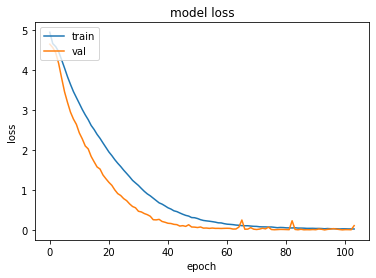

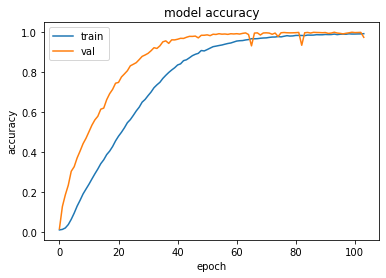

In [16]:
print('Plots')
plt.plot(history_const.history['loss'])
plt.plot(history_const.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
# plt.savefig('F:/VA/onehandtwohand/26words_DSLR_results/'+model_name1+'_loss.png')
plt.savefig(load_path+model_name1+'_loss.png')
plt.show()
plt.plot(history_const.history['accuracy'])
plt.plot(history_const.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')

plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.savefig(load_path+model_name1+'_accuracy.png')
plt.show()

In [ ]:
print('Confusion matrix')
Y_pred = model1.predict(X_new)
y_pred = np.argmax(Y_pred, axis=1)
y_test1 = np.argmax(y_new, axis=1)

cm=metrics.confusion_matrix(y_test1, y_pred)


cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
a4_dims = (200, 100)
fig,ax= plt.subplots(figsize=a4_dims)
sns.heatmap(cm, annot=True, fmt=".2f", ax=ax,  linewidth=.5);  
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.set_xticklabels(CATEGORIES)
ax.set_yticklabels(CATEGORIES)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.setp(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
plt.setp(ax.get_yticklabels(), rotation=0, horizontalalignment='right')
plt.savefig(load_path+model_name1+'_cm.png',bbox_inches='tight')
plt.show()


In [ ]:
#PLot fractional incorrect misclassifications

incorr_fraction = 1 - np.diag(cm) / np.sum(cm, axis=1)

fig, ax = plt.subplots(figsize=(12,8))
plt.bar(np.arange(cat_len), incorr_fraction)
plt.xlabel('True Label')
plt.ylabel('Fraction of incorrect predictions')
plt.xticks(np.arange(cat_len), CATEGORIES)
plt.savefig(load_path+model_name1+'_incorrect_percentage.png',bbox_inches='tight')
plt.show()

In [ ]:
#CHECK RANDOM IMAGES FROM TESTED DATA WHETHER RIGHT OR WRONG

i = random.randint(1,cat_len)
plt.imshow(X_new[i,:,:,2]) 
print("Predicted Label: ", CATEGORIES[int(y_pred[i])])
print("True Label: ", CATEGORIES[int(y_test1[i])])

# Colourful mediapipe testing with VA_create_3.0

In [19]:
import cv2
import mediapipe as mp
mp_drawing = mp.solutions.drawing_utils
mp_drawing_styles = mp.solutions.drawing_styles
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results
    
def draw_landmarks(image, results):   
    #face
    mp_drawing.draw_landmarks(
        image,
        results.face_landmarks,
        mp_holistic.FACEMESH_CONTOURS,
        landmark_drawing_spec=None,
        connection_drawing_spec=mp_drawing_styles
        .get_default_face_mesh_contours_style())
#     #pose
#     mp_drawing.draw_landmarks(
#         image,
#         results.pose_landmarks,
#         mp_holistic.POSE_CONNECTIONS,
#         landmark_drawing_spec=mp_drawing_styles
#         .get_default_pose_landmarks_style())
    
    #left hand
    mp_drawing.draw_landmarks(
        image,
        results.left_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())
    # right hand
    mp_drawing.draw_landmarks(
        image,
        results.right_hand_landmarks,
        mp_holistic.HAND_CONNECTIONS,
#         landmark_drawing_spec=None,
            mp_drawing_styles.get_default_hand_landmarks_style(),
            mp_drawing_styles.get_default_hand_connections_style())

In [25]:
## For veryyyyyyyy beautiful webcam input:

cap = cv2.VideoCapture(0)
org = (20, 20)  
org1 = (310, 20) 
fontScale = 0.65  
font = cv2.FONT_HERSHEY_SIMPLEX
# Blue color in BGR
color = (130, 0, 0)  
# Line thickness of 2 px
thickness = 1 
thickness1 = -1
start_point = (0,0)
end_point = (480,30)
color1 = (255, 255, 255)  
cls='R'
with mp_holistic.Holistic(min_detection_confidence=0.5,min_tracking_confidence=0.5) as holistic:
      while cap.isOpened():
        #image from feeder
        r, img_array = cap.read()
        img_array = cv2.flip(img_array, 1)
        #webcam
        img_array = img_array[:, 80:560, :]
        #dslr
#         img_array = cv2.resize(img_array[:, 224:800, :],(480,480))
        
        image, results = mediapipe_detection(img_array, holistic)
        draw_landmarks(image, results)
        if not (results.left_hand_landmarks or results.right_hand_landmarks):
            continue

        # white background
        img = np.zeros([480,480,3],dtype=np.uint8)
        img.fill(255) 
        draw_landmarks(img, results)

        # for prediction
        IMG_SIZE=128
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
        X = np.array(img).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
        X = X.astype('float32')
        X /= 255
        X = np.array(X)
        Y = model1.predict(X,verbose=0)

        if np.max(Y)>0.2:
            # for display
            image = cv2.rectangle(image, start_point, end_point, color1, thickness1)
            image = cv2.rectangle(image, (0,30), (480,30), color, 2)
            image = cv2.putText(image,"Prediction: "+ CATEGORIES[np.argmax(Y)], org, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
            image = cv2.putText(image,"Accuracy: "+ "%.2f" % np.max(Y), org1, font, 
                   fontScale, color, thickness, cv2.LINE_AA)
#             if CATEGORIES[np.argmax(Y)]==cls:
            if np.max(Y)>0.8:
                cv2.imwrite(load_path+'/99.79_misc_rajesh/mp_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',image)
                cv2.imwrite(load_path+'/99.79_misc_rajesh/ori_'+
                            CATEGORIES[np.argmax(Y)]+'_'+str(np.max(Y))+'.jpg',img_array)


        cv2.imshow('Realtime testing', image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
                break
# close the camera
cap.release()

# close all the opened windows
cv2.destroyAllWindows()